## Assingment 3 fra the python bois


2. create a function to read the csv file containing Copenhagen city population data and return a numpy array (numpy.ndarray). hint: use np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1) as in the slides

In [1]:
import numpy as np
pop_array = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(pop_array)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


3. create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries.
How many are there of each? (hint remember that with python you can return multiple values from a function).

In [2]:
def get_population_of_english_and_nonenglish_speaking(look_up_list, year):
    english_speaking = [5314,5390,5502,5514,5170,5142]
    
    print('nr 1 er befolkningstallet for australien, canada, irland, new zealand, storbritannien og usa. nr 2 er resten af verdenen')
    
    population_of_englishspeakers = []
    
    for i in range(len(english_speaking)):
        
        population_of_englishspeakers = look_up_list[np.where((look_up_list[:,3] == english_speaking[i]) & (look_up_list[:,0] == year))]    
    
    population_of_nonenglishspeakers = []
          
    population_of_nonenglishspeakers = look_up_list[(look_up_list[:,0] == year) & (look_up_list[:,3] != english_speaking)]
    
    
    sum_of_englishspeakers = population_of_englishspeakers[:,4].sum()
    
    sum_of_nonenglishspeakers = population_of_nonenglishspeakers[:,4].sum()
    
    return sum_of_englishspeakers, sum_of_nonenglishspeakers

In [3]:
def speaking_a_language(mask, n=None):
    if n:
        all_people_speaking= dd[mask & (dd[:,3]== n)]
    else:
        all_people_speaking= dd[mask]
    
    sum_of_people = all_people_speaking[:,4].sum()
    return sum_of_people

In [4]:
dd = pop_array
english_speaking_country = {1: 5314, 2: 5390, 3: 5502, 4: 5514, 5: 5170, 6: 5142}
mask = ((dd[:,0]== 2015))
english = np.array([speaking_a_language(mask,statecode)for statecode in english_speaking_country.values()])
print(str(english.sum())+" people form english speaking country")
print(str( speaking_a_language(mask)- english.sum())+" from non speaking country")

8979 people form english speaking country
571316 from non speaking country


In [5]:
#pop_array = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
pop1, pop2 = get_population_of_english_and_nonenglish_speaking(pop_array, 2015)
print(str(pop1)+ " is english speakers and " +str(pop2)+" is non-english speakers.")



nr 1 er befolkningstallet for australien, canada, irland, new zealand, storbritannien og usa. nr 2 er resten af verdenen
565 is english speakers and 580295 is non-english speakers.


C:\Users\Tiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  


4. Now create another function that can take 2 arguments:

 - 1: the dataset in the form of a 2dimensional data array where y=data rows and x=[year, area, age nationality, amount].

 - 2: the mask in the form: data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year

 - 3:the return value must be the filtered dataset.

In [6]:
def get_population(look_up_list, land_code, year):
    population = []
    for i in range(len(land_code)):
        population = look_up_list[(look_up_list[:,3] == land_code[i]) & (look_up_list[:,0] == year)]
        
    return population[:,4].sum()

In [7]:
lands = [5160, 5170, 5120, 5130]
print(get_population(pop_array, lands, 2015))



statecode2 = {1: 5160, 2: 5170, 3: 5120, 4: 5130}
swedish = np.array([speaking_a_language(mask,statecode)for statecode in statecode2.values()])
print(swedish.sum())


2156
11811


5. Create another function that can take 2 arguments:

 - a dataset with same characteristics as above and

 - a value for the x-axis (either year, area, age or nationality)

 - return value should be the accumulated population for all x-values.

 - hint: if year is chosen for x then y is all accumulated amounts from all areas, ages and nationalities.

In [8]:
def get_population_from_year(look_up_list, year):
    population = look_up_list[(look_up_list[:,0] == year)]
    print(population)
    return population[:,4].sum()
get_population_from_year(pop_array, 2015)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [2015   99   82 5100    1]
 [2015   99   86 5289    1]
 [2015   99   90 5289    1]]


580295

6. Create Illustration 1: In your notebook use the above function and create a 2d array of year as x and accumulated amount as y:
  - create a line graph of the population change over time for all of Copenhagen

In [9]:
def x_values_sum(data , column_name_number):
    a_data_dict ={}
   # for year in data[:,column_name_number]:
    for year in np.unique(data[:,column_name_number]):
        mask = (data[:,0]==year)
        a_data_dict[year] = sum(data[mask][:,4])
    return a_data_dict

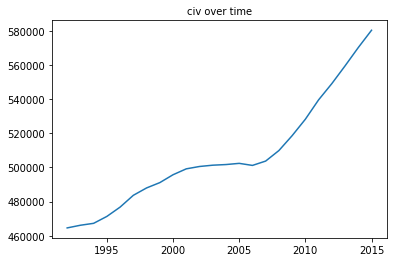

In [12]:
import matplotlib.pyplot as plt
dic = x_values_sum(pop_array,0)
title = "civ over time"
plt.title(title, fontsize=10)
plt.plot(dic.keys(),dic.values())
plt.show()


7. Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time

<function matplotlib.pyplot.show(*args, **kw)>

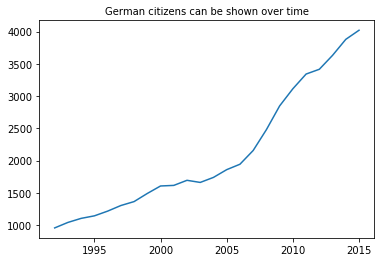

In [11]:
ger_mask = pop_array[:,3]== 5180
ger_dataset = pop_array[ger_mask]
ger_dic = x_values_sum(ger_dataset,0)
title = "German citizens can be shown over time"
plt.title(title, fontsize=10)
plt.plot(ger_dic.keys(),ger_dic.values())
plt.show

8. Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

9. Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. create another similar piechart for Vesterbro.